In [462]:
import os
import re

import pathlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import google.generativeai as genai

from time import sleep

In [463]:
DATASET_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "processed" / "dataset.csv"
DATASET_PREVIOUS_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "processed" / "previous_categorized" / "dataset_previous.csv"

In [464]:
df = pd.read_csv(DATASET_PREVIOUS_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9556 entries, 0 to 9555
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  9556 non-null   object
 1   Category     9556 non-null   object
dtypes: object(2)
memory usage: 149.4+ KB


In [465]:
def categories_plot(df):
    value_counts = df['Category'].value_counts()
    print(value_counts)
    
    sns.barplot(
    x=value_counts.index,
    y=value_counts,
    palette='coolwarm',
    hue=value_counts
    )
    plt.xlabel('Categories', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Распределение Categories', fontsize=14)
    plt.xticks(rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

In [466]:
def regex_clean_description(text):
    pattern = r"""[^a-zA-Zа-яА-ЯёЁ\s]"""
    
    return re.sub(pattern, '', text)

In [467]:
def remove_quotes(text):
  return text.strip('"')

Category
FOOD_GOODS        2309
SERVICE           2113
NON_FOOD_GOODS    1748
LEASING            981
REAL_ESTATE        843
LOAN               722
BANK_SERVICE       466
NOT_CLASSIFIED     213
TAX                161
Name: count, dtype: int64


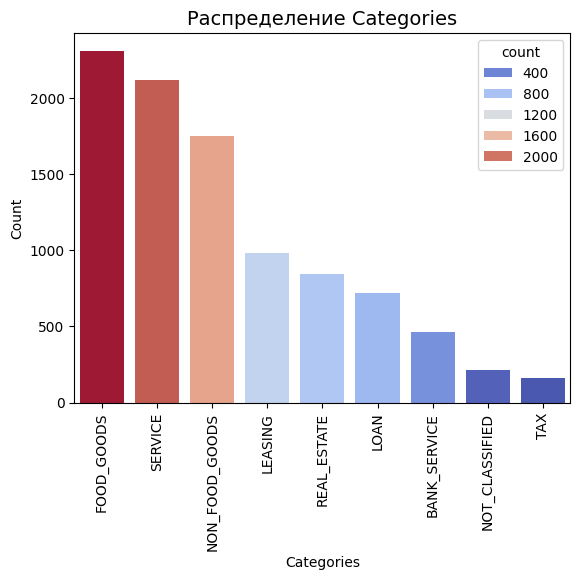

In [468]:
categories_plot(df)

df['Description'] = df['Description'].apply(regex_clean_description)
df['Description'] = df['Description'].apply(remove_quotes)
df = df.drop_duplicates(subset=['Description'], keep='first')
df = df.reset_index(drop=True)
print(df.info())
df

In [469]:
changes_count = 0

In [470]:
df_copy = df.copy()

In [471]:
df_copy

,Description,Category
0,За тур.поездку по договору №001 от 27.01.2023г,SERVICE
1,За оказание услуг по договору №53Б-02746 от 23...,SERVICE
2,Оплата штрафа,TAX
3,Лечение по договору №Д-00359/24 от 08.03.2025,SERVICE
4,Оплата основного долга за период с 16.12.2024г...,LOAN
...,...,...
9551,Оплата за Фарш говяжий Рестория 400г по счету ...,FOOD_GOODS
9552,"Оплата по сч. 237 от 14 сентября 2026, за тран...",SERVICE
9553,По предвариельному договору №Б03411/33 от 27.0...,REAL_ESTATE
9554,За участие в конференции в г. Саранск по догов...,SERVICE


In [472]:
def change_category(text, category):
    global changes_count
    for index, row in df.iterrows():
        if text.lower() in row['Description'].lower():
            df.loc[index, 'Category'] = category
            changes_count += 1
            
    return df

In [473]:
def get_redacted():
    df_redacted = df.loc[df['Category'] != df_copy['Category']]
    return df_redacted

In [475]:
changes = {
    "тур.поездку": "SERVICE",
    "оказание услуг по договору": "SERVICE",
    "лечение": "SERVICE",
    "Оплата основного долга": "BANK_SERVICE",
    "пошлина": "TAX",
    "наклад": "FOOD_GOODS",
    "финансовой аренды": "LEASING",
    "Конфеты": "FOOD_GOODS",
    "консультирование": "SERVICE",
    "справку": "BANK_SERVICE",
    "Счет на оплату": "NON_FOOD_GOODS",
    "рыба": "FOOD_GOODS",
    "займ": "LOAN",
    "коммунал": "SERVICE",
    "лизинг": "LEASING",
    "гос.": "TAX",
    "доставк": "SERVICE",
    "гашение": "BANK_SERVICE",
    "сброс": "NOT_CLASSIFIED",
    "предоставление": "BANK_SERVICE",
    "аренда поме": "REAL_ESTATE",
    "валютного ко": "BANK_SERVICE",
    "средство": "NON_FOOD_GOODS",
    "паев": "REAL_ESTATE",
    "ретение недвижимости по адр": "REAL_ESTATE",
    "авиа": "SERVICE",
    "ли-про": "REAL_ESTATE",
    "салфет": "NON_FOOD_GOODS",
    "консульс": "TAX",
    "выплата": "TAX",
    "перец": "FOOD_GOODS",
    "комиссия за обслуживание": "BANK_SERVICE",
    " части ": "NON_FOOD_GOODS",
    "строительные": "SERVICE",
    "размещение": "SERVICE",
    "ратор": "FOOD_GOODS",
    "раствор ": "NON_FOOD_GOODS",
    "растворим": "FOOD_GOODS",
    "ссия за спр": "BANK_SERVICE",
    "масло ": "FOOD_GOODS", 
    "форель": "FOOD_GOODS",
    "ое обслуж": "SERVICE",
    "зефир": "FOOD_GOODS",
    "минтай": "FOOD_GOODS",
    "катер ": "SERVICE",
    "веч": "NON_FOOD_GOODS",
    "конференции": "SERVICE",
    "насос": "NON_FOOD_GOODS",
    "ата дог": "NOT_CLASSIFIED",
    "Манка": "FOOD_GOODS",
    "Сумка": "NON_FOOD_GOODS",
    "Шпроты": "FOOD_GOODS",
    "Гвоздика": "FOOD_GOODS",
    "Кислота": "FOOD_GOODS",
    "Икра": "FOOD_GOODS",
    "Порошок": "NON_FOOD_GOODS",
    "Хлопья": "FOOD_GOODS",
    "Филе": "FOOD_GOODS",
    "Печенье": "FOOD_GOODS",
    "Тушка": "FOOD_GOODS",
    "Контейнеры": "NON_FOOD_GOODS",
    "Чай": "FOOD_GOODS",
    "Драже": "FOOD_GOODS",
    "Гречка": "FOOD_GOODS",
    "Кисель": "FOOD_GOODS",
    "Спички": "NON_FOOD_GOODS",
    "Светодиодная": "NON_FOOD_GOODS",
    "Фольга": "NON_FOOD_GOODS",
    "Соленья": "FOOD_GOODS",
    "Халва": "FOOD_GOODS",
    "Варенье": "FOOD_GOODS",
    "Гель": "NON_FOOD_GOODS",
    "Маска": "NON_FOOD_GOODS",
    "Газета": "NON_FOOD_GOODS",
    "бронирование": "SERVICE",
    "гостини": "SERVICE",
    "транспортировку": "SERVICE",
    "информационные": "SERVICE",
    "обучен": "SERVICE",
    "аренду п": "REAL_ESTATE",
    "какао": "FOOD_GOODS",
    "пломбир": "FOOD_GOODS",
    "ие услуг": "SERVICE",
    "ие отеля": "SERVICE",
    "рыбны": "FOOD_GOODS",
    "шоколад": "FOOD_GOODS",
    "пряник": "FOOD_GOODS",
    "шоколад": "FOOD_GOODS",
    "паста": "FOOD_GOODS",
    "я паста": "NON_FOOD_GOODS",
    "сырье": "NON_FOOD_GOODS",
    "срочн": "BANK_SERVICE",
    
}

Проверено 6728 строк
Category
SERVICE           2387
FOOD_GOODS        2095
NON_FOOD_GOODS    1626
LEASING           1153
REAL_ESTATE        883
BANK_SERVICE       653
LOAN               542
NOT_CLASSIFIED     182
TAX                 35
Name: count, dtype: int64


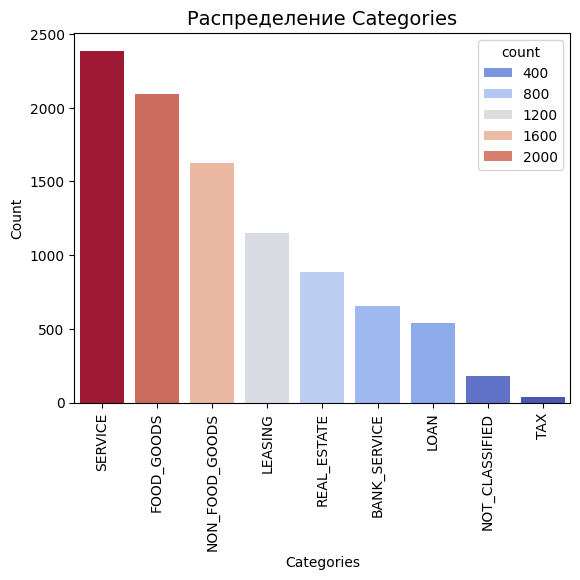

In [476]:
for key, value in changes.items():
    df = change_category(key, value)


print(f"Проверено {changes_count} строк")
categories_plot(df)

In [477]:
df_redacted = get_redacted().reset_index(drop=True)
df_unredacted = df[df['Category'] == df_copy['Category']].reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  1875 non-null   object
 1   Category     1875 non-null   object
dtypes: object(2)
memory usage: 29.4+ KB
None
Category
SERVICE           514
BANK_SERVICE      323
LEASING           283
NON_FOOD_GOODS    192
REAL_ESTATE       189
FOOD_GOODS        157
LOAN              122
NOT_CLASSIFIED     87
TAX                 8
Name: count, dtype: int64


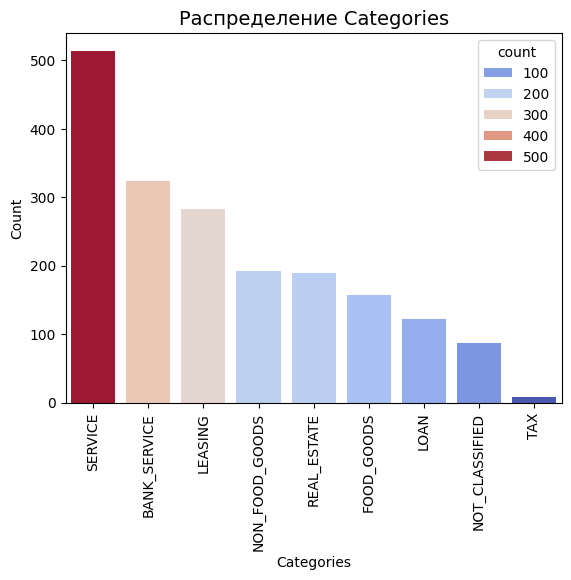

In [478]:
print(df_redacted.info())
categories_plot(df_redacted)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7681 entries, 0 to 7680
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  7681 non-null   object
 1   Category     7681 non-null   object
dtypes: object(2)
memory usage: 120.1+ KB
None
Category
FOOD_GOODS        1938
SERVICE           1873
NON_FOOD_GOODS    1434
LEASING            870
REAL_ESTATE        694
LOAN               420
BANK_SERVICE       330
NOT_CLASSIFIED      95
TAX                 27
Name: count, dtype: int64


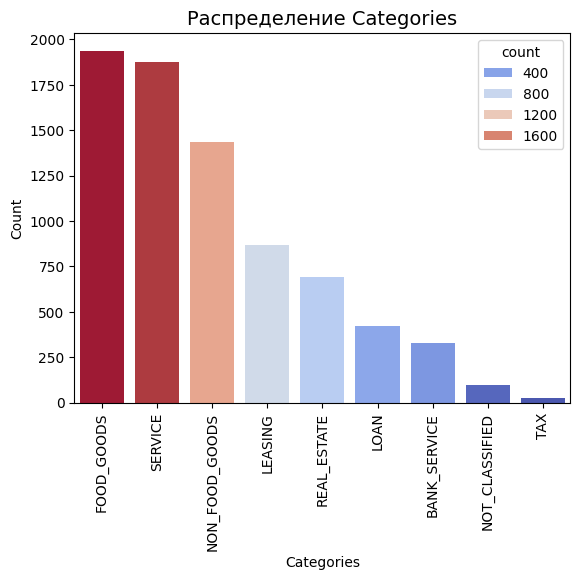

In [479]:
print(df_unredacted.info())
categories_plot(df_unredacted)

In [480]:
df_unredacted

,Description,Category
0,За тур.поездку по договору №001 от 27.01.2023г,SERVICE
1,За оказание услуг по договору №53Б-02746 от 23...,SERVICE
2,Оплата штрафа,TAX
3,Лечение по договору №Д-00359/24 от 08.03.2025,SERVICE
4,Оплата за Бульон Роллтон Домашний куриный 90г ...,FOOD_GOODS
...,...,...
7676,Оплата за Фарш говяжий Рестория 400г по счету ...,FOOD_GOODS
7677,"Оплата по сч. 237 от 14 сентября 2026, за тран...",SERVICE
7678,По предвариельному договору №Б03411/33 от 27.0...,REAL_ESTATE
7679,За участие в конференции в г. Саранск по догов...,SERVICE


In [485]:
df

,Description,Category
0,За тур.поездку по договору №001 от 27.01.2023г,SERVICE
1,За оказание услуг по договору №53Б-02746 от 23...,SERVICE
2,Оплата штрафа,TAX
3,Лечение по договору №Д-00359/24 от 08.03.2025,SERVICE
4,Оплата основного долга за период с 16.12.2024г...,BANK_SERVICE
...,...,...
9551,Оплата за Фарш говяжий Рестория 400г по счету ...,FOOD_GOODS
9552,"Оплата по сч. 237 от 14 сентября 2026, за тран...",SERVICE
9553,По предвариельному договору №Б03411/33 от 27.0...,REAL_ESTATE
9554,За участие в конференции в г. Саранск по догов...,SERVICE


In [ ]:
df.to_csv(DATASET_PATH, index=False)

Category
SERVICE           2387
FOOD_GOODS        2095
NON_FOOD_GOODS    1626
LEASING           1153
REAL_ESTATE        883
BANK_SERVICE       653
LOAN               542
NOT_CLASSIFIED     182
TAX                 35
Name: count, dtype: int64


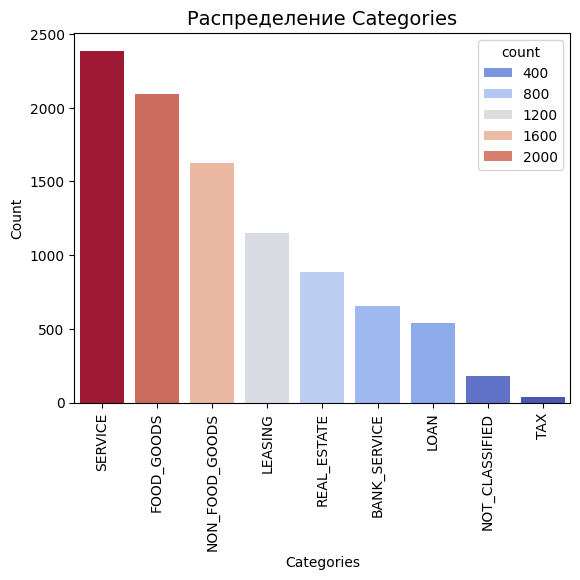

In [489]:
categories_plot(df)

---

In [ ]:
from openai import OpenAI

client = OpenAI(
  base_url = "https://integrate.api.nvidia.com/v1",
  api_key = "$API_KEY_REQUIRED_IF_EXECUTING_OUTSIDE_NGC"
)

In [545]:
PAYMENTS_TRAINING_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "raw" / "payments_training.tsv"

DATASET_UNDERSAMPLED_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "processed" / "dataset_undersampled.csv"
DATASET_OVERSAMPLED_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "processed" / "dataset_oversampled.csv"

In [577]:
df_oversampled = df.copy()
df_undersampled = df.copy()

In [546]:
df_payments_training = pd.read_csv(PAYMENTS_TRAINING_PATH, sep="\t", names=['Date', 'Amount', 'Description', 'Category'], index_col=0)
df_payments_training

,Date,Amount,Description,Category
1,07.11.2024,15300.00,За участие в конференции в г. Майкоп по догово...,SERVICE
2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
...,...,...,...,...
496,07.11.2024,2610.00,Оплата налогов,TAX
497,07.11.2024,31200-00,Комиссия за выполнение функций агента валютног...,BANK_SERVICE
498,07.11.2024,18200-00,За тур.поездку по договору №75-04243Г от 24/04...,SERVICE
499,07.11.2024,"2870000,00","Оплата по договору №095 от 24.02.2025г, счету ...",FOOD_GOODS


In [ ]:
df_tax_proved = df_payments_training[df_payments_training['Category'] == 'TAX'].drop(['Date', 'Amount'], axis=1).reset_index(drop=True)
df_not_classified_proved = df_payments_training[df_payments_training['Category'] == 'NOT_CLASSIFIED'].drop(['Date', 'Amount'], axis=1).reset_index(drop=True)

In [548]:
df_tax_unproved = df[df['Category'] == 'TAX'].reset_index(drop=True)
df_not_classified_unproved = df[df['Category'] == 'NOT_CLASSIFIED'].reset_index(drop=True)

In [600]:
df_food_goods = df[df['Category'] == 'FOOD_GOODS'].reset_index(drop=True)

In [602]:
df_food_goods['Description'].to_list()

['Оплата за Бульон Роллтон Домашний куриный 90г по счету 27336253164249532548 от 28.05.2023г Сумма 4210.00',
 'Оплата по товарной накладной 0049 от 30 октября 2025 за конфеты "Алёнка".Сумма 11800-00 В т.ч. НДС 20% 1966-66',
 'Оплата за Конфеты Milla Vanilla Трюфель классический 200г по счету 02975795096475183726 от 08.07.2023г Сумма 3010.00',
 'Оплата за Сушеная и вяленая рыба по счету 89060952434565760499 от 28/05/2026 Сумма 910.00',
 'Оплата аванса за ГСМ по счету А-0631 от 21.01.2024г к Договору №Г02634 от 16.04.2025г. на сумму 1960000-00В т.ч. НДС(20%) 326666-66',
 'Оплата за Чернослив Красная Цена 100 г по счету 37542489267283838868 от 24.12.2026 г. Сумма 2970,00',
 'Оплата по сч. 0165 от 30/11/2025 за абхазсие мандарины. Сумма 22000.00 В т.ч. НДС 20% - 3666.66',
 'Оплата по товарой накладной за 100 штук пачек кофе Lavaza по счету 0403 от 10.11.2025г .Сумма 17100-00 В т.ч. НДС 20% 2850-00',
 'Оплата за Конфеты Milla Vanilla с кокосовой стружкой 150г по счету 90436675415349880460 о

In [556]:
def get_completion(prompt, category):
    content = \
        f"Твоя задача: продолжить датасет, который я тебе отправлю. Если это уместно, меняй цифры, шрифт и знаки препинания. Не отклоняйся от темы. Опирайся на описания колонок:" + \
        """ BANK_SERVICE: Банковские услуги, комиссии банка, кредиты, платежи за счёт банка, кредиты на покупку имущества, предоставление кредита

    FOOD_GOODS: Продукты питания, оплата еды

    NON_FOOD_GOODS: Непродовольственные товары, химикаты, косметика, одежда, бытовые товары

    LEASING: Лизинговые платежи, договоры лизинга, акты приема-передачи

    LOAN: Платежи по кредитам, процентные займы, договоры займа

    REAL_ESTATE: Операции с недвижимостью, инвестиции в недвижимость, аренда недвижимости, паевые взносы, покупка недвижимости, оплата аренды, жилое помещение

    SERVICE: Услуги (консалтинг, ремонт, транспорт и т.д.), оплата коммунальных услуг, лечение по договору,

    TAX: Налоги, сборы, штрафы, пошлины

    NOT_CLASSIFIED: Переводы на собственный счёт, оплата за сброс загрязняющих веществ, оборотные средства или если платёж не похож на любую другую категорию или имеет с ними слишком мало общего.""" + \
        f"\nВ наборе данных могут появляться лишние значения, игнорируй их опираясь только на главные. Начало датасета категории {category}:\n```{prompt}```"
        
    completion = client.chat.completions.create(
    model="meta/llama-3.1-405b-instruct",
    messages=[{"role":"user","content":content}],
    temperature=0.2,
    top_p=0.7,
    max_tokens=4096,
    stream=False
    )

    return completion.choices[0].message

In [584]:
category = "TAX"

In [585]:
prompt = """
['Оплата гос. пошлины',
 'государственная пошлина',
 'гос.услуга',
 'Оплата гос. услуги',
 'государственная пошлина',
 'Консульские сборы',
 'Оплата гос. пошлины',
 'государственная пошлина',
 'Консульские сборы',
 'Оплата государственной пошлины',
 'государственная пошлина',
 'гос. пошлина',
 'Выплата на содержание родных детей',
 'Оплата гос. пошлины',
 'Оплата гос. услуги',
 'Оплата налогов',
 'Оплата гос. услуги',
 'государственная пошлина',
 'Оплата государственной пошлины',
 'Выплата на содержание родных детей',
 'Консульские сборы',
 'Оплата налогов',
 'Консульский сбор',
 'Выплата на содержание родных детей',
 'Оплата гос. пошлины',
 'Оплата гос. пошлины',
 'Выплата на содержание родных детей',
 'Консульские сборы',
 'государственная пошлина',
 'Оплата государственной пошлины',
 'Выплата на содержание родных детей',
 'государственная пошлина',
 'Оплата гос. пошлины',
 'Оплата государственной пошлины',
 'Оплата гос. пошлины',
 'Оплата государственной пошлины',
 'Оплата гос. услуги',
 'Выплата на содержание родных детей',
 'Оплата налогов',
 'государственная пошлина',
 'государственная пошлина',
 'Оплата государственной пошлины',
 'Консульские сборы',
 'Оплата государственной пошлины',
 'гос.услуга',
 'Оплата налогов',
 'Оплата гос. услуги',
 'Оплата налогов']

"""

In [586]:
response = get_completion(
    prompt=prompt,
    category=category
)

In [587]:
with open('response.txt', 'w') as f: f.write(response.to_dict()['content'])

In [589]:
with open('response.txt', 'r') as f:
    response_list = []
    for line in f:
        response_list.append(line.strip(",\n").strip("'"))

In [590]:
len(response_list)

97

In [591]:
for response in response_list:
    df_oversampled = pd.concat([df_oversampled, pd.DataFrame({'Description': [response], 'Category': [category]})], ignore_index=True)

In [603]:
df_oversampled.to_csv(DATASET_OVERSAMPLED_PATH, index=False)

Category
SERVICE           2387
FOOD_GOODS        2095
NON_FOOD_GOODS    1626
LEASING           1153
REAL_ESTATE        883
BANK_SERVICE       653
LOAN               542
NOT_CLASSIFIED     278
TAX                132
Name: count, dtype: int64


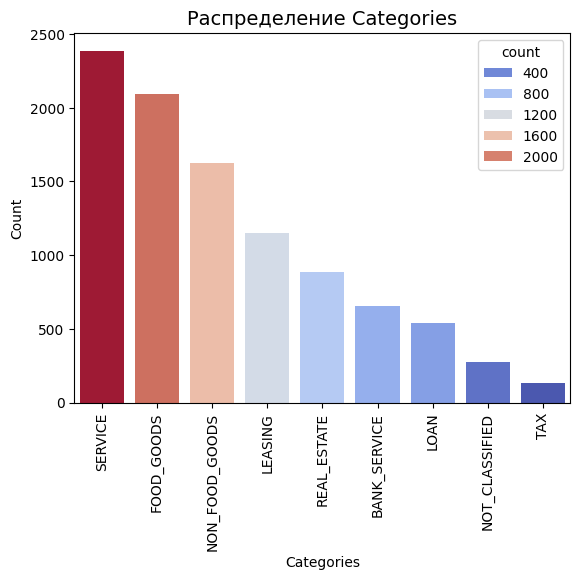

In [593]:
categories_plot(df_oversampled)